In [1]:
!pip install -U scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 21.9 MB/s eta 0:00:00
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import cv2
from PIL import Image
from skimage.segmentation import find_boundaries
from skimage.io import imread
import plotly.graph_objects as go
from scipy.stats import ttest_ind
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import scipy.stats as stats

computational measurement

In [ ]:
def measure(img):
  img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
  edges = cv2.Canny(img, 50, 300)#mark border lines of the image

  lst = []
  len4 = int(edges.shape[1]/4)
  for i in range(len4,len4*3):
    column = edges[:, i]
    if 255 in column[:len(column)//3] and 255 in column[len(column)*2//3:]:
      lst.append(np.where(column == 255)[0][-1] - np.where(column == 255)[0][0])
  if lst:
    return(np.median(lst))

manual measurement data

In [ ]:
control_images_dir="/content/drive/MyDrive/bacteria_dimensions_project/data_for_classification_model/control_cells/"
acidic_images_dir="/content/drive/MyDrive/bacteria_dimensions_project/data_for_classification_model/acidic_cells/"
manual_measurement_data="/content/drive/MyDrive/bacteria_dimensions_project/bacteria_dimensions/manual_measurement_data.csv"

In [ ]:
df = pd.read_csv(manual_measurement_data)
df['image'] = df.apply(lambda row: Image.open(control_images_dir + row['filename']) if row['state'] == 'C' else Image.open(acidic_images_dir + row['filename']), axis=1)
df

,filename,state,length,width,image_length,image_width
0,Box_2_Control_074_1_14211.jpg,C,68,24,70,30
1,Box_2_Control_074_1_14217.jpg,C,65,23,67,27
2,Box_2_Control_074_1_14219.jpg,C,44,22,46,23
3,Box_2_Control_074_1_14227.jpg,C,42,26,46,27
4,Box_2_Control_074_2_14276.jpg,C,56,25,58,27
...,...,...,...,...,...,...
195,Box_3_Acidic_016_1_4524.jpg,A,76,24,80,26
196,Box_3_Acidic_016_3_4540.jpg,A,58,23,59,29
197,Box_3_Acidic_016_5_4569.jpg,A,49,22,51,25
198,Box_3_Acidic_016_6_4574.jpg,A,91,24,94,31


Accuracy of computational measurement compared to manual measurement

In [ ]:
df['measure_width']= df['image'].apply(measure)
df = df.dropna(subset=["measure_width"], how='any')
error = ((df['width'] - df['measure_width']) / df['width']) * 100
print(error[:20])

print("mean error: ",(error.abs()).mean(),"%")

0      2.083333
1     13.043478
2     13.636364
4      8.000000
5      8.333333
6      0.000000
7      3.571429
8     -4.761905
10     8.000000
11     0.000000
13     0.000000
14     0.000000
15    -4.000000
16     8.333333
17     4.000000
18    -3.846154
19    40.000000
20     7.407407
21    -3.846154
22     4.000000
dtype: float64
mean error:  5.048084625680318 %


<ipython-input-14-aade822630d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['measure_width']= df['image'].apply(measure)


In [ ]:
df.drop("image", axis=1).to_csv("cell_dimensions.csv", index = False)

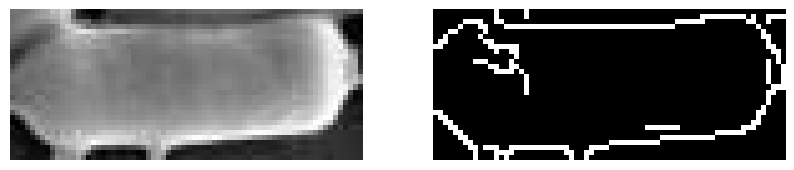

manual width:  24
computational width:  23.5


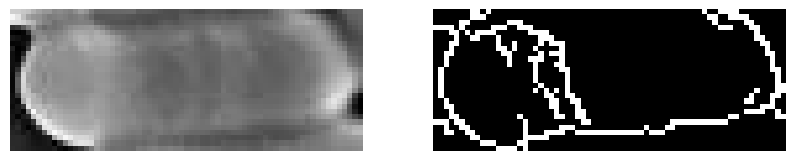

manual width:  23
computational width:  20.0


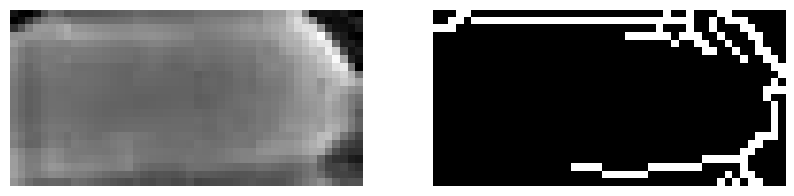

manual width:  22
computational width:  19.0


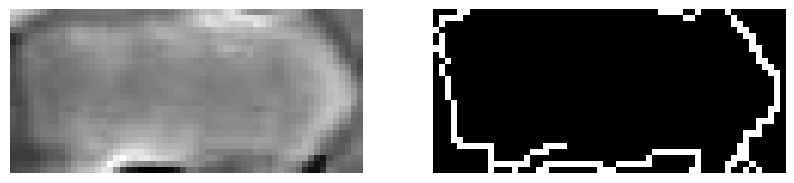

manual width:  25
computational width:  23.0


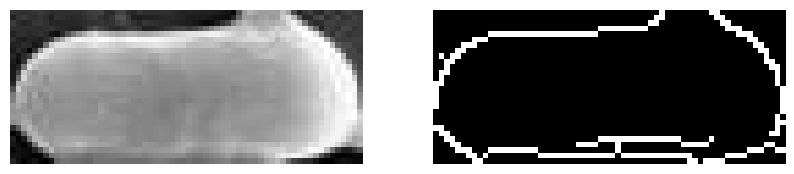

manual width:  24
computational width:  22.0


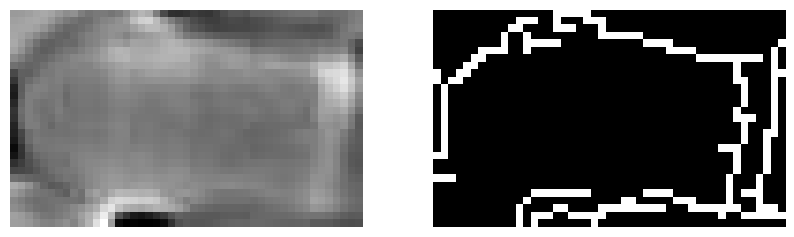

manual width:  23
computational width:  23.0


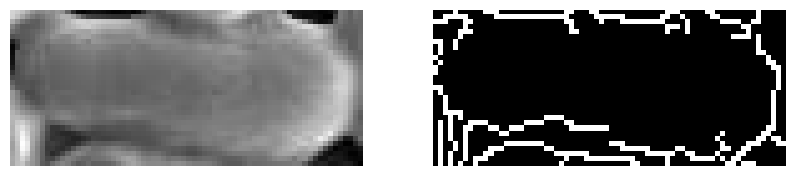

manual width:  28
computational width:  27.0


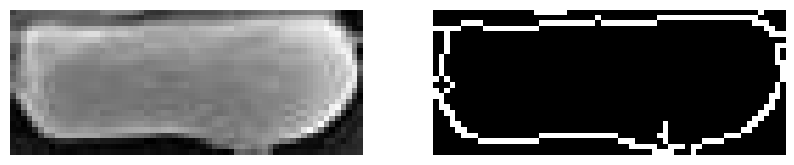

manual width:  21
computational width:  22.0


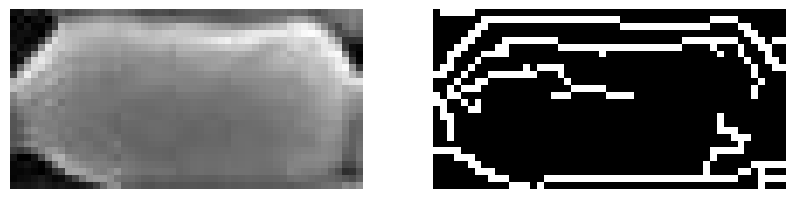

manual width:  25
computational width:  23.0


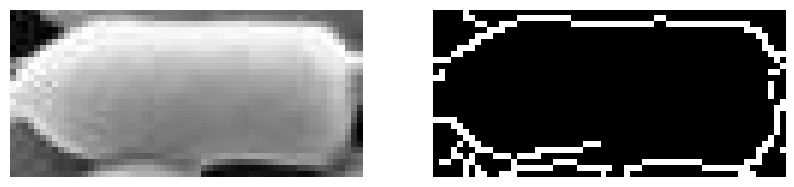

manual width:  24
computational width:  24.0


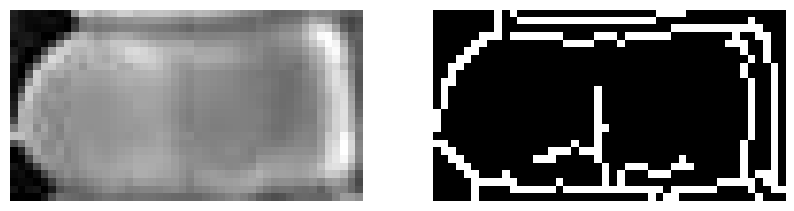

manual width:  22
computational width:  22.0


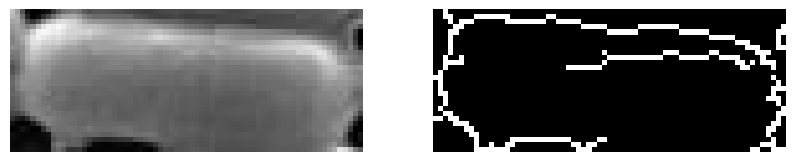

manual width:  23
computational width:  23.0


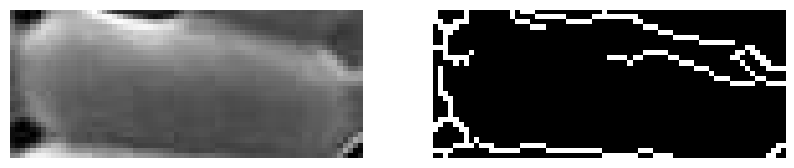

manual width:  25
computational width:  26.0


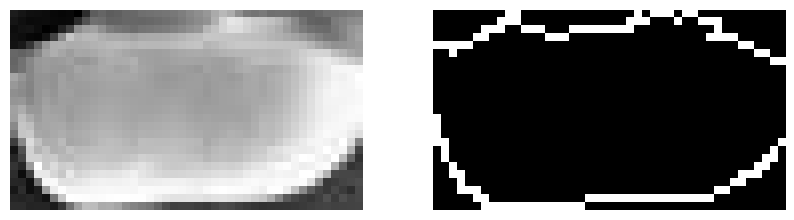

manual width:  24
computational width:  22.0


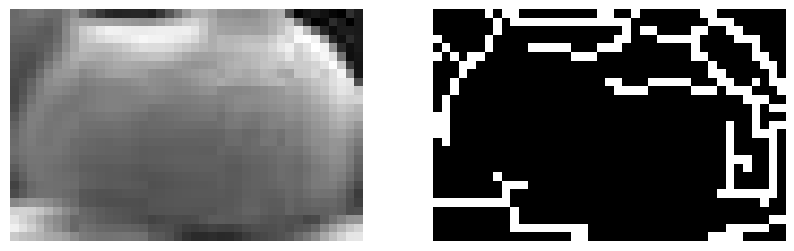

manual width:  25
computational width:  24.0


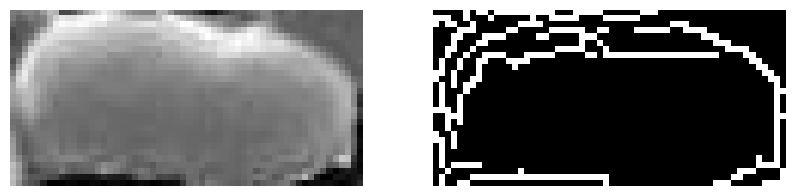

manual width:  26
computational width:  27.0


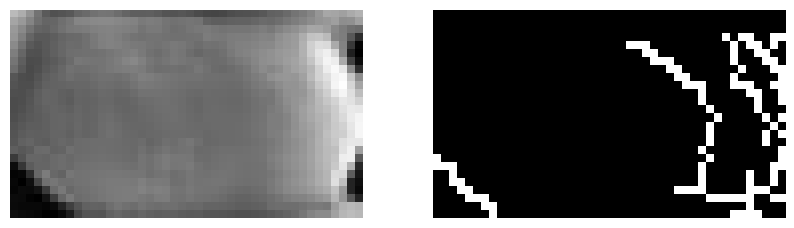

manual width:  25
computational width:  15.0


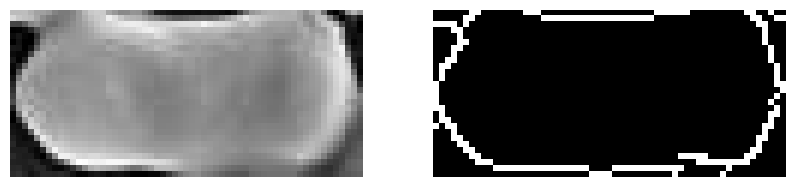

manual width:  27
computational width:  25.0


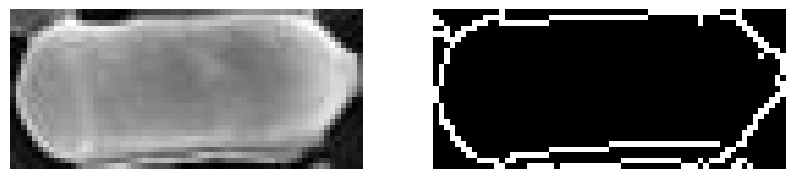

manual width:  26
computational width:  27.0


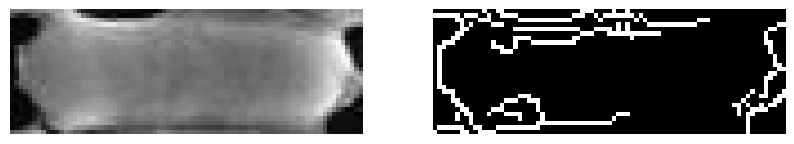

manual width:  25
computational width:  24.0


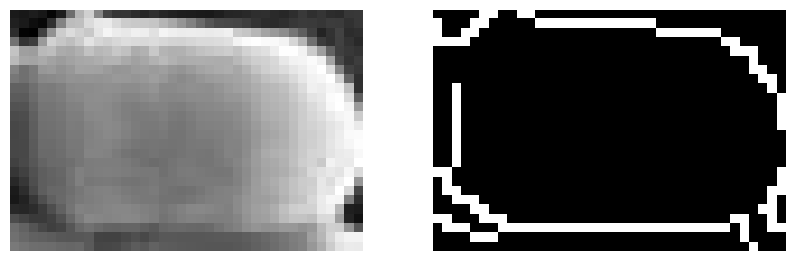

manual width:  24
computational width:  22.0


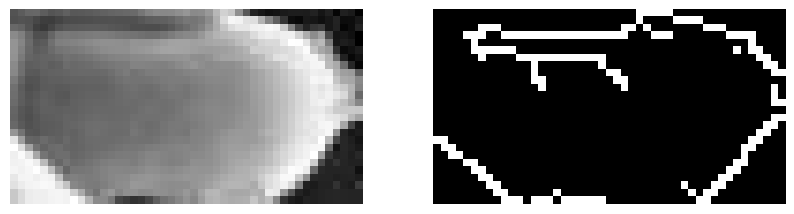

manual width:  24
computational width:  22.0


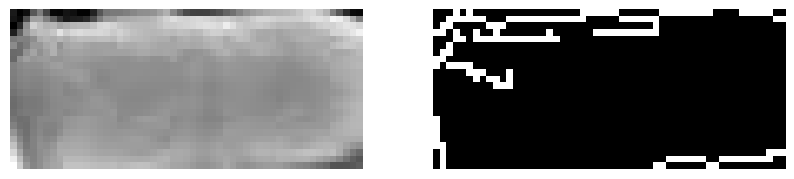

manual width:  23
computational width:  22.0


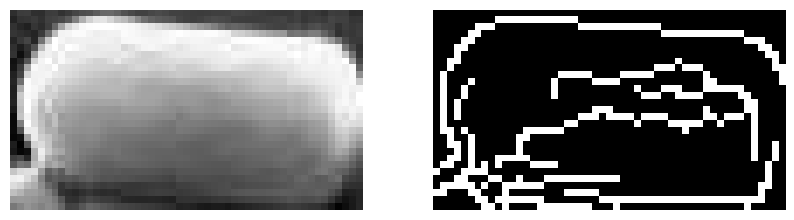

manual width:  25
computational width:  25.5


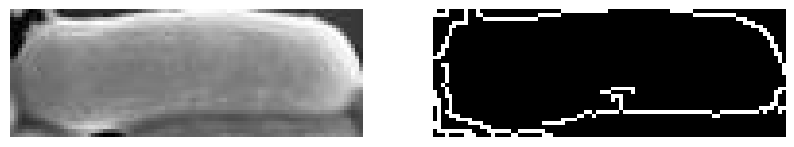

manual width:  30
computational width:  28.0


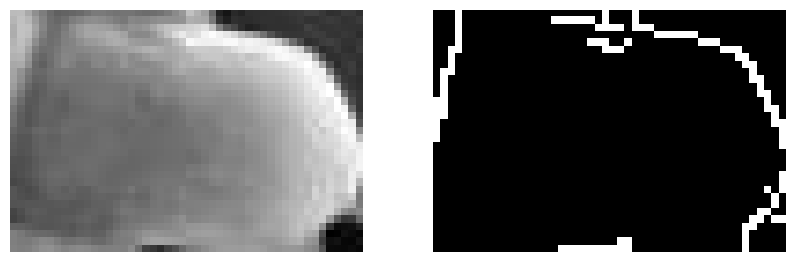

manual width:  30
computational width:  31.0


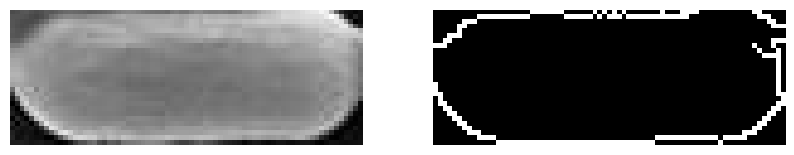

manual width:  27
computational width:  26.0


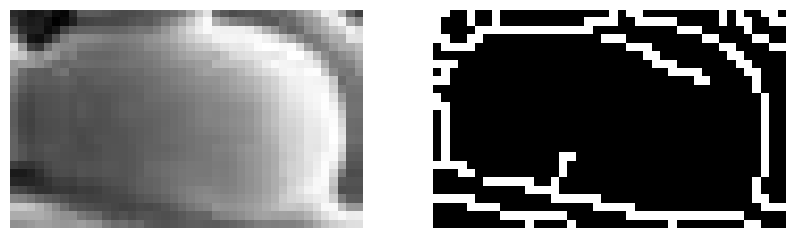

manual width:  23
computational width:  22.0


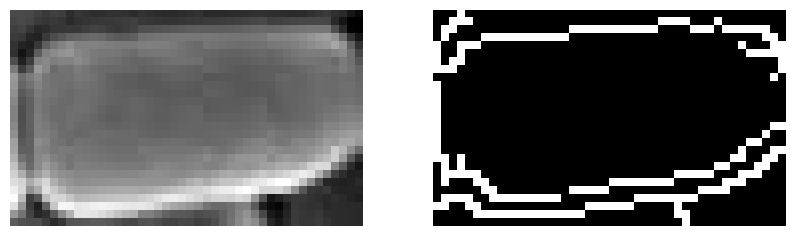

manual width:  24
computational width:  22.0


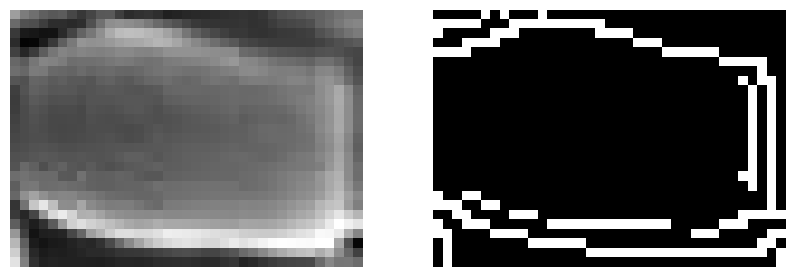

manual width:  23
computational width:  23.0


In [ ]:
for index, row in df.head(30).iterrows():

    img = row['image']
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    edges = cv2.Canny(img, 50, 300)

    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.show()
    print("manual width: ", row['width'])
    print("computational width: ", measure(img))
